# fastai pour le traitement d'images

In [25]:
from fastai.vision.all import *

1. Importation de la base de données

  a) Base de données publique sur le web (note: tar = données compressées (équivalent à zip))


In [23]:
chemin_donnees = untar_data(URLs.PETS) #checker les autres databases dispo
print(chemin_donnees.ls())

[Path('/root/.fastai/data/oxford-iiit-pet/annotations'), Path('/root/.fastai/data/oxford-iiit-pet/images')]


Il y a 2 dossiers qui ont été téléchargés: "annotations" et "images"

On veut utiliser les images (pas les annotations)

In [24]:
fichiers = get_image_files(chemin_donnees/"images")
print(type(fichiers))
print(type(fichiers[0]))
print(type(str(fichiers[0])))
print(fichiers[0])
print(fichiers.items[0])
print(str(fichiers[0]))

print("subpaths:")
print(fichiers[0].parent)
print(fichiers[0].suffix)
print(fichiers[0].name)

<class 'fastcore.foundation.L'>
<class 'pathlib.PosixPath'>
<class 'str'>
/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_170.jpg
/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_170.jpg
/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_170.jpg
subpaths:
/root/.fastai/data/oxford-iiit-pet/images
.jpg
japanese_chin_170.jpg


Le type de données "L" est une liste adaptée aux fonctions de fastai.

Pour connaitre tous les arguments possibles d'une variable, utiliser "dir"

In [ ]:
f = fichiers[0]
dir(f)

  b) Fichiers stockés dans le PC

In [5]:
# téléchargement d'une image web (chat)
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/June_odd-eyed-cat_cropped.jpg/1216px-June_odd-eyed-cat_cropped.jpg 
# téléchargement d'une image web (chien)
!wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/golden-retriever-royalty-free-image-506756303-1560962726.jpg
# récupérer le nom des fichiers correspondant à des images dans le dossier courant
import glob
mes_images = glob.glob("./*.jpg")
print("les images s'appellent: ", mes_images)

--2022-11-23 13:13:47--  https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/June_odd-eyed-cat_cropped.jpg/1216px-June_odd-eyed-cat_cropped.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 286421 (280K) [image/jpeg]
Saving to: ‘1216px-June_odd-eyed-cat_cropped.jpg’

1216px-June_odd-eye 100%[===================>] 279.71K  --.-KB/s    in 0.04s   

2022-11-23 13:13:47 (6.17 MB/s) - ‘1216px-June_odd-eyed-cat_cropped.jpg’ saved [286421/286421]

--2022-11-23 13:13:47--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/golden-retriever-royalty-free-image-506756303-1560962726.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP reques

In [6]:
print(mes_images)
print(mes_images[0])
print(type(mes_images))
print(type(mes_images[0]))

['./1216px-June_odd-eyed-cat_cropped.jpg', './golden-retriever-royalty-free-image-506756303-1560962726.jpg']
./1216px-June_odd-eyed-cat_cropped.jpg
<class 'list'>
<class 'str'>


  c) Images au sein de l'environnement

In [6]:
from torchvision.io import read_image
mon_image = mes_images[0]
im = read_image(mon_image)
print(im.shape)

torch.Size([3, 1024, 1216])


Dans la [doc de pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html), on remarque que la fonction **imshow** permet d'afficher une matrice image.

/!\ Celle-ci doit être de shape (Height, Width) OU (Height, Width, Channels) → on doit permuter les dimensions avec **im.permute**

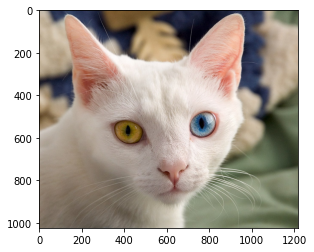

In [7]:
from matplotlib import pyplot as plt
plt.imshow(im.permute(1,2,0))
# check la doc de pyplot

# Exercices

1. Afficher "mon image" en nuances de gris
2. Afficher la 10ème image de la base de donnée "cifar" /train/airplane

torch.Size([1024, 1216])


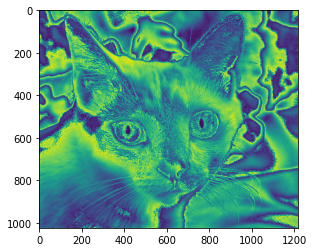

In [10]:
# Solution 1
im_gray = im[0,:,:]+im[1,:,:]+im[2,:,:] # Une image en nuance de gris est obtenue en sommant toutes les channels.
print(im_gray.shape)
#/!\ le résultat est une matrice à 2 dimensions (Height, Width)

plt.imshow(im_gray,cmap='gray') #on utilise "cmap" pour forcer les propriétés de Colab qui affichent les matrices 2D en nuances de vert par défaut

In [ ]:
# Solution 2
# chemin_donnees2 = untar_data(URLs.CIFAR) # decompression de la database "CIFAR"
print(chemin_donnees2.ls()) # dans le listing des sous-dossiers, on remarque que CIFAR est trié en test-train (on veut accéder à train)
chemin_donnees2_train = chemin_donnees2/"train"
print(chemin_donnees2_train.ls()) # dans le listing des sous-dossiers, on remarque que train est trié par classe (on veut accéder à la classe airplane)

fichiers2 = get_image_files(chemin_donnees2/"train/airplane")
print(fichiers2[:10]) # print des chemins correspondants aux 10 premières images

# On veut AFFICHER les images
for _,item in enumerate(fichiers2[:10]):
  print(type(item))
  im2 = read_image(str(item)) # read_image requiert un string, or item est un PosixPath => conversion avec "str"
  print(im2.shape) # les channels se trouvent en première dimension => besoin de permute
  plt.imshow(im2.permute(1,2,0))
  plt.show()

# 2. Définition des labels (catégories)

Explorer les noms de fichiers

In [ ]:
for i in range(10):
  print(fichiers[i].name)


Abyssinian_134.jpg
pomeranian_106.jpg
Ragdoll_182.jpg
Maine_Coon_26.jpg
english_cocker_spaniel_55.jpg
Abyssinian_100.jpg
american_bulldog_15.jpg
Ragdoll_16.jpg
Bombay_2.jpg
pomeranian_160.jpg


Ici, les races de chiens sont écrites avec une minuscule et les races de chat avec une Majuscule

**Exercice 3** : Trouver une fonction qui permet de trier chat/chien

In [4]:
# Solution 3
def label_func(f): 
  name = f.name #on veut accéder aux noms uniquement
  return name[0].isupper() #on veut tester la première lettre uniquement donc on applique "isupper" au premier élément de name (name[0])

**Exercice 4** : Créer un vecteur "cat" qui contient 0 pour tous les indices correspondant à un chien et 1 pour ceux correspondant à un chat.

In [21]:
# Solution 4
cat = np.zeros(len(fichiers)) # on crée un vecteur de la taille voulue (on y met que des 0 au départ)
print(cat.shape)
for idx,item in enumerate(fichiers):
  cat[idx] = label_func(item) # on utilise la fonction définie à l'exercice 3 pour tester la présence de la majuscule élément par élément

# Vérification
for i in range(10):
  print(cat[i], ' ', fichiers[i].name)

(7390,)
0.0   saint_bernard_133.jpg
0.0   wheaten_terrier_82.jpg
1.0   Egyptian_Mau_92.jpg
0.0   leonberger_79.jpg
1.0   Russian_Blue_51.jpg
0.0   american_bulldog_173.jpg
1.0   Siamese_112.jpg
1.0   Birman_82.jpg
0.0   havanese_70.jpg
1.0   Bombay_193.jpg


## 3. Séparation des données

On veut "splitter" les données en une partie entraînement et une partie validation.

Entraînement : partie des données utilisée pour mettre à jour les paramètres du modèle

Validation : partie des données utilisée pour s'assurer que le modèle est capable de généraliser la tâche à des données inconnues

Fonctions de fastai utiles : IndexSplitter et RandomSplitter

In [21]:
fichiers = get_image_files(chemin_donnees/"images")


NameError: ignored

In [26]:
n_donnees_train = int(len(fichiers)*0.80) # 80% de la database utilisée pour l'entraînement
splits = (L(range(n_donnees_train), use_list=True),
          L(np.arange(n_donnees_train, len(fichiers)), use_list=True)) # On crée 2 listes de classe "L" (1. entraînement, 2. validation)
print("splits: ")
print(np.shape(splits))
print(splits[0][:10])
print(splits[1][:10])

splitter = IndexSplitter(splits[1])
print("splitter: ")
print(splitter) # splitter est une fonction

splits: 
(2,)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5912, 5913, 5914, 5915, 5916, 5917, 5918, 5919, 5920, 5921]
splitter: 
<function IndexSplitter.<locals>._inner at 0x7fadbc984d40>


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


## 4. Entrer les données dans le modèle

La classe "[DataBlock](https://docs.fast.ai/data.block.html)" nous permet de définir la structure des données à charger. ([code source](https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L81))

In [9]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),  # définition du TYPE d'entrée / sortie
                 get_items=get_image_files,           # définition du CHARGEMENT des entrées
                 get_y = label_func,                  # définition du CHARGEMENT des sorties
                 splitter=splitter)                   # définition de la SEPARATION des données

La fonction "[dataloaders](https://github.com/fastai/fastai/blob/master/fastai/data/block.py)", interne à DataBlock, permet de définir comment les données seront entrées dans le modèle au moment de l'entraînement.

In [ ]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images", bs=16) # bs = batch size
dls.show_batch() #note: show_batch() affiche 9 images au maximum

Une erreur survient car les images ne sont pas toutes de la même taille.

On doit changer la taille de celles-ci avant d'entrer dans le modèle grâce à la fonction **Resize**.

Cette transformation est indiquée au sein du DataBlock avec l'argument **item_tfms**.

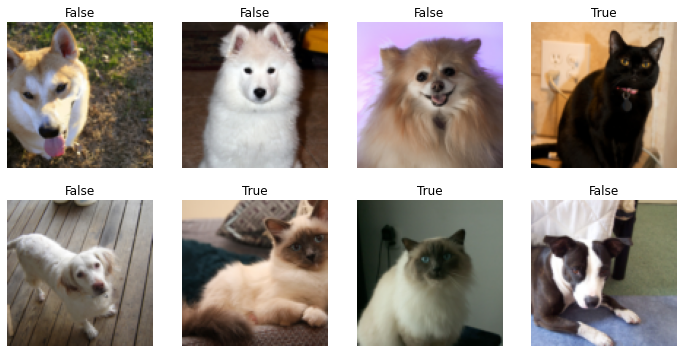

In [11]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 get_y = label_func,
                 splitter=splitter,
                 item_tfms=Resize(100))     # Couper les images pour obtenir une taille de 100x100 pour toutes

dls = pets.dataloaders(untar_data(URLs.PETS)/"images", bs=8) # bs = batch size
dls.show_batch() #note: show_batch() affiche 9 images au maximum

# Note : le "false" et "true" au dessus des images représentent la classe : false = chien, true = chat

**Exercice 5** :

Créer un loader (PETS data) qui split les données de manière aléatoire (70% train, 30% validation) pour obtenir une input de 

shape (4, 3, 80, 120)

Note : Checker la doc de [RandomSplitter](https://docs.fast.ai/data.transforms.html#randomsplitter)

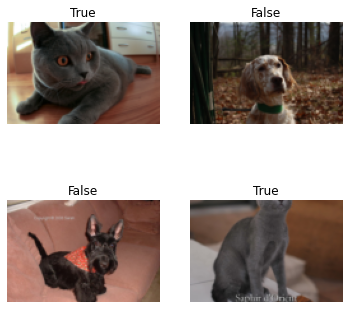

In [12]:
# Solution 5
splitter = RandomSplitter(valid_pct=0.3) #pas besoin de définir des indices car on split de manière aléatoire
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 get_y = label_func,
                 splitter=splitter,
                 item_tfms=Resize((80,120)))
dls = pets.dataloaders(untar_data(URLs.PETS)/"images", bs=4)
dls.show_batch()

In [13]:
batch1 = dls.one_batch()[0] # le [0] permet de sélectionner les entrées car one_batch extrait un Tuple (entrée, sortie)
print(type(batch1))
print(batch1.shape)

<class 'fastai.torch_core.TensorImage'>
torch.Size([4, 3, 80, 120])


Le Data Loader crée un batch de type **TENSOR**. C'est le type de données requis pour entrer dans le réseau de neurones.

La shape de ce Tensor est bien constituée de 4 dimensions : (B, C, H, W)

# 5. Utiliser des images existantes au sein de l'environnement

**Exercice 6** :
Créer un dataloader prenant les 2 images locales de "content" (chat et chien) avec une shape de (1, 3, 512, 512)

In [8]:
# Solution 6
# 1) On rassemble toutes les images au sein d'un tensor avec la shape voulue (excepté pour le batch size qui est défini dans le dataloader)
im_tensor = torch.zeros(len(mes_images), 3, 512, 512) #création du tensor vide
for i,item in enumerate(mes_images):
  mon_image = read_image(item)            # lecture de l'image
  im_tensor[i] = mon_image[:,:512,:512]   # on crop l'image à la taille voulue
print(im_tensor.shape)

torch.Size([2, 3, 512, 512])


In [17]:
# Solution 6
# 2) on définit les catégories
cat = [1, 0] # la 1ère image est un chat et la 2ème est un chien

# 3) on définit un nouveau dataloader
def my_dataloader(tensor_entree, cat_sortie):
  def pass_index(i):    # par défaut, "dblock.dataloaders" prend une liste d'indices en argument, il faut définir comment les gérer
    return i

  def get_x(i):         # comment charger les inputs
    return tensor_entree[i]

  def get_y(i):         # comment charger les outputs
    return cat_sortie[i]

  # on crée le DataBlock (note: pas besoin de splitter parce qu'on a que 2 images donc pas assez pour entrainement/validation)
  dblock = DataBlock( blocks=(TransformBlock, CategoryBlock),
                      get_items=pass_index,
                      get_x=get_x,
                      get_y=get_y)
  
  nombre_images = tensor_entree.shape[0] #la première dimension du tensor d'entrée nous donne le nombre d'éléments à traiter
  dls = dblock.dataloaders(list(range(nombre_images)), bs=1) 

  return dls

# 4) on crée le dataloader
dls = my_dataloader(im_tensor, cat)
print(dls.one_batch()[0].shape)

torch.Size([1, 3, 512, 512])


torch.Size([1, 3, 512, 512])
torch.Size([512, 512, 3])


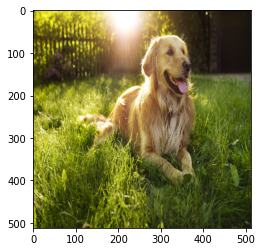

In [19]:
# Bonus : afficher l'image contenue dans un batch

batch1 = dls.one_batch()[0] # prendre l'input d'un batch
print(batch1.shape)
b = batch1[0]               # prendre le 1er élément du batch 
b = b.permute(1,2,0)        # permuter pour satistifaire les dimensions requise par plt.imshow
plt.imshow(b)
plt.show()

# Note: si vous travaillez sur CPU, tout fonctionne
#       MAIS, si vous travaillez sur GPU, il faut d'abord transférer le tensor sur CPU pour pouvoir utiliser pyplot
b = b.cpu()
print(b.shape)
plt.imshow(b)
plt.show()

# l'image ne s'affiche pas correctement... Cela est dû au fait que les matrices
# considérées comme des images doivent avoir des valeurs de pixel entre [0 et 1]
# ou bien entre [0 et 255]
# => on doit NORMALISER notre matrices
b = b/b.max() # on divise toutes les valeurs du tensor par le maximum pour avoir des valuers finales entre [0 et 1]
plt.imshow(b)
plt.show()

Ici, il n'y a qu'une partie de l'image qui s'affiche parce qu'on a crop celle-ci au 6.1).

On peut utiliser la fonction "resize" de torchvision.transform.functional pour changer la taille de l'image

In [ ]:
from torchvision.transforms.functional import resize
im_tensor = torch.zeros(len(mes_images), 3, 512, 512)
for i,item in enumerate(mes_images):
  mon_image = read_image(item)
  im_tensor[i] = resize(mon_image,(512,512))
print(im_tensor.shape)

# On peut donc faire tourner les 2 cellules précédentes pour avoir la nouvelle image

# 6. Utiliser un réseau pré-entraîné

resnet34 permet de reconnaître toute une série de classes dont chat/chien.

Nous allons créer un **LEARNER** utilisant ce réseau et notre dataloader

Les data d'entrées doivent être de taille 224 pour resnet34

In [17]:
splitter = RandomSplitter(valid_pct=0.3)
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 get_y = label_func,
                 splitter=splitter,
                 item_tfms=Resize(224))
dls = pets.dataloaders(untar_data(URLs.PETS)/"images", bs=16)

learn = vision_learner(dls, resnet34, metrics=accuracy) # la "metrics" permet d'avoir un retour sur la performance du modèle

In [18]:
# On peut l'entraîner
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.098078,0.020194,0.992332,01:01


Par défaut, le modèle utilisé est le modèle pré-entraîné. Il permet d'atteindre une précision de 99% ici.

On peut observer la différence de performance lorsqu'on utilise le modèle non entraîné



In [19]:
learn = vision_learner(dls, resnet34, metrics=accuracy, pretrained=False)
learn.fit(1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.789262,1.011223,0.612990,01:02


Sans pré-entraînement, la précision chute à 61%